In [3]:
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.io as pio
import numpy as np
import scipy.stats as st
import seaborn as sns

pio.renderers.default = "svg"

path_gemini_3h = Path("../../data/exploratory-data/gemini-3h.parquet")
path_gemini_3g = Path("../../data/exploratory-data/gemini-3g.parquet")

In [4]:
df_gemini_3h = pd.read_parquet(path_gemini_3h)

In [5]:
df_gemini_3h.describe()

,Block number,Slot,Space according to consensus
count,713169.000000,7.131690e+05,7.131690e+05
mean,360959.124084,5.068778e+08,2.422234e+16
std,211673.111941,3.201904e+08,1.785869e+16
min,0.000000,0.000000e+00,1.048672e+09
25%,178292.000000,2.288141e+08,4.327588e+15
50%,356584.000000,4.975291e+08,2.467703e+16
75%,534876.000000,7.700101e+08,3.951971e+16
max,731164.000000,1.071642e+09,5.924702e+16


/Users/danlessa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/danlessa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/danlessa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/danlessa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



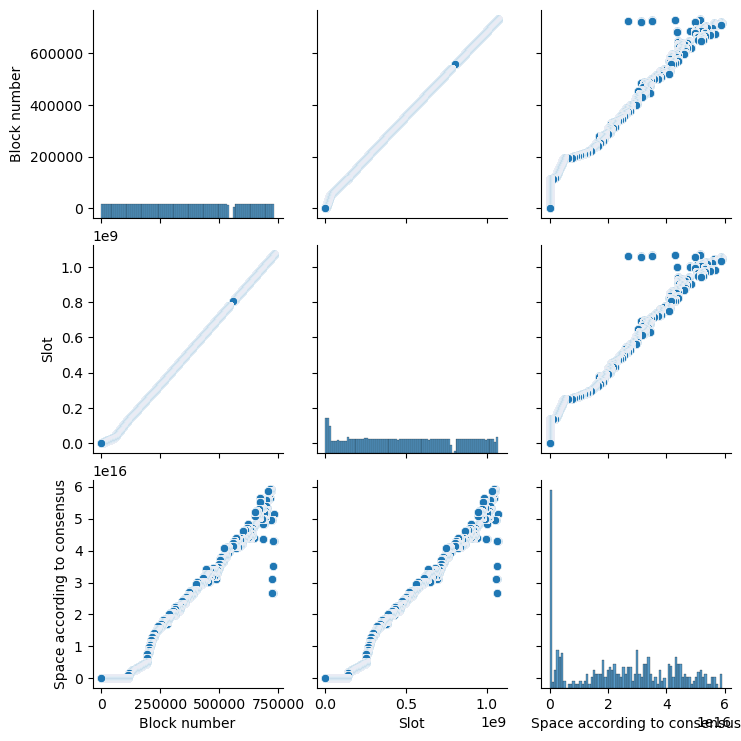

In [6]:
sns.pairplot(df_gemini_3h)

In [9]:
blocks_per_day = int((60 / 6) * 60 * 24)

In [11]:
df_gemini_3h['day'] = df_gemini_3h['Block number'] // blocks_per_day

In [20]:
s = df_gemini_3h.groupby('day')['Space according to consensus'].mean().reset_index()

<Axes: xlabel='day', ylabel='Space according to consensus'>

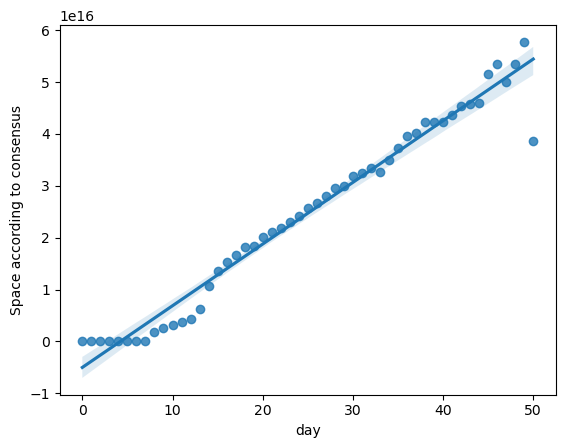

In [21]:
sns.regplot(data=s, x='day', y='Space according to consensus')